This Kernel is my attempt to apply FastAI tabular implementation . The dataset is basically asking to to predict if the customer with a given set of features will cancel or not cancel . This is not a competition dataset so I had to select a evaluation metric. 

Seeing the un-balanced nature of the dependent variable i choose auc-roc-score which is a binary metric designed for unbalanced dataset. So basically the auc-roc-score says how confident a model is between the possible outcome . Here my auc-roc-socre of 0.948 says the model is 94.8 percent certain in predicting 1 vs 0 

I have included some EDA in the below kernel . Please go through the kernel . Please upvote if you like it and feel free to comment!!!

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.figure_factory import create_table
import plotly.express as px

plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


 So the job here is to predict whether the booking goes through or not that is is_canceled column is our dependent variable . <br>
 
 This model could be very beneficial for the hotel managment to plan inventory or can also help better schedule worker's schedule <br>

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.shape

(119390, 32)

In [6]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [8]:
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [9]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [10]:
df['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [11]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [12]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [13]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [14]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [15]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [16]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [17]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [18]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [19]:
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [20]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [21]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [22]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

# Lets Explore the dataset with some prelimanary EDA 

Text(0.5, 1.0, 'Distribution of Cancelations')

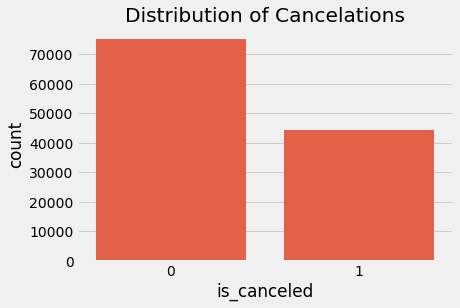

In [23]:
color=sns.color_palette()[1]
sns.countplot(data=df,x='is_canceled',color=color);
plt.title('Distribution of Cancelations')

As the data skewed we can chose Area Under the ROC cuve/F1 score / Recall/Precision as the metrics we will chose ROC curve as our guiding metric for this problem 

Text(0.5, 1.0, 'Hotel Type Count')

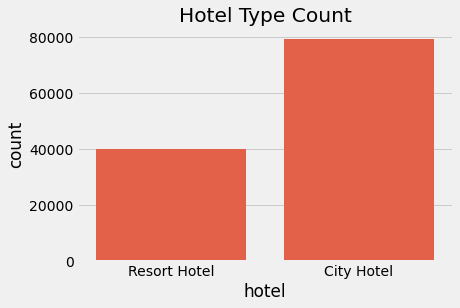

In [24]:
color=sns.color_palette()[1]
sns.countplot(data=df,x='hotel',color=color);
plt.title('Hotel Type Count')

In [25]:
df.shape[0]

119390

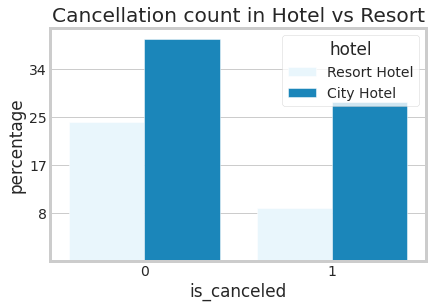

In [26]:
sns.set_style('whitegrid')
row=df.shape[0]
color=sns.color_palette()[0]
sns.countplot(data=df,x='is_canceled',hue='hotel',color=color);
#df.plot(kind='bar',stacked=True,legend=False)
plt.yticks([10000,20000,30000,40000],[8,17,25,34]);
plt.ylabel('percentage');
plt.title('Cancellation count in Hotel vs Resort');

In [27]:
df['arrival_date_year'].min(),df['arrival_date_year'].max()

(2015, 2017)

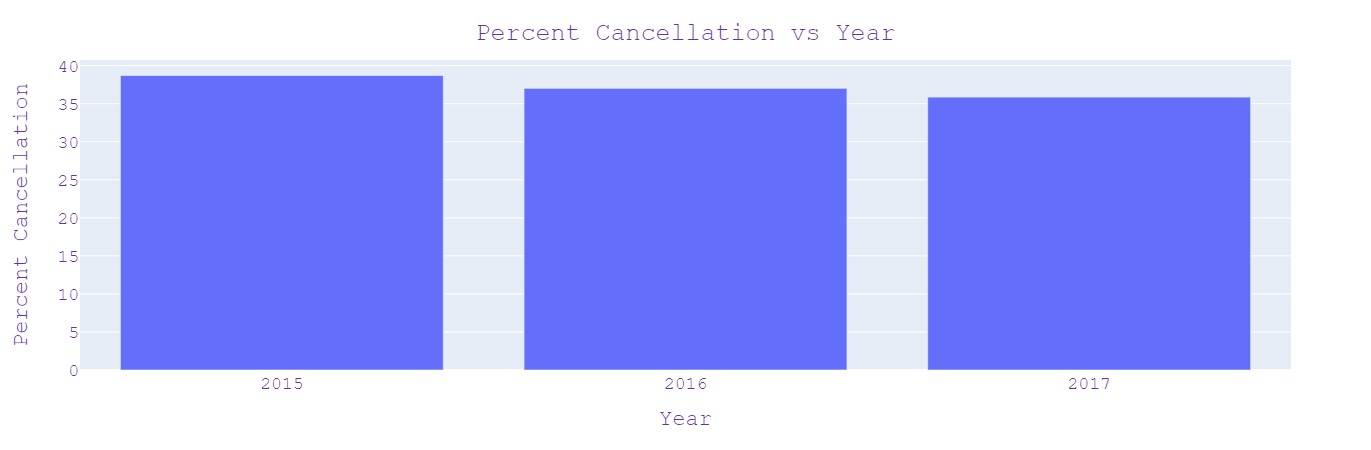

In [28]:
fig = px.bar(x=df["arrival_date_year"].value_counts().index, 
             y=(df.groupby('arrival_date_year').aggregate('sum')['is_canceled']/df.groupby('arrival_date_year').aggregate('count')['is_canceled'])*100,
             
             )

fig.update_layout(
    title={
        'text': "Percent Cancellation vs Year",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Year",
    yaxis_title="Percent Cancellation",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.update_xaxes(tickvals=[2015,2016,2017])
fig.show()

The percentage of booking cancelation seem pretty constant across year hence it makes more sense to better predict cancellation about a booking 

# Timelaps of cancellations 

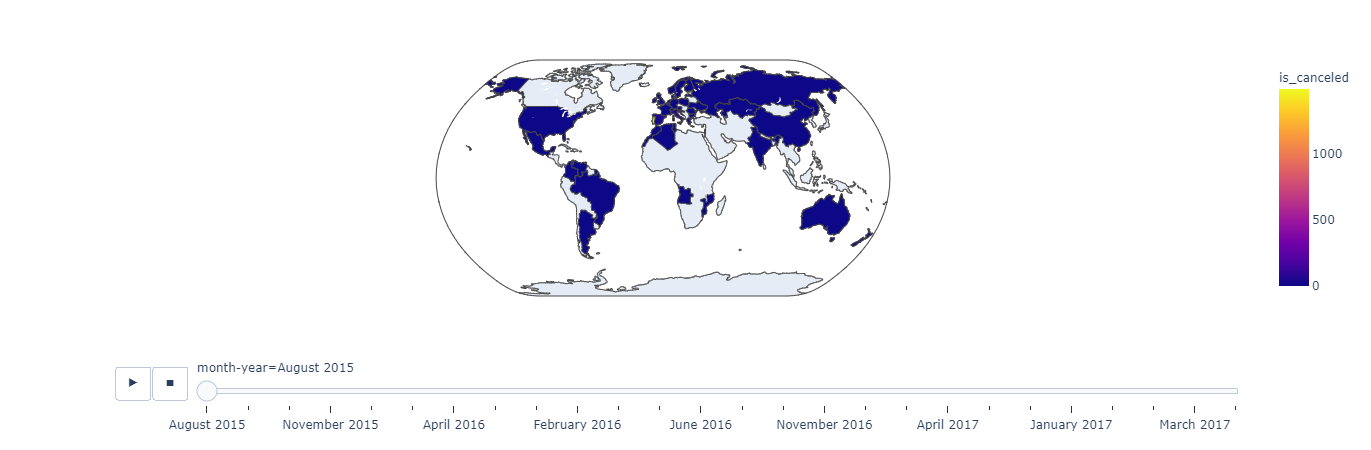

In [29]:
timelapse=df.groupby(['arrival_date_year','arrival_date_month','country']).aggregate('sum')['is_canceled'].to_frame().reset_index()
timelapse['month-year']=timelapse.arrival_date_month.astype(str)+' '+timelapse.arrival_date_year.astype(str)

px.choropleth(timelapse, locations="country", color='is_canceled', hover_name="country", animation_frame='month-year',
              color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

We see that most countries fall pretty on the lower range of the scale apart from countries close along the Meditarrian Belt such as Portugal , Spain , UK Italy and France so this is one the variable to look forward too 

# Cancelations by month 


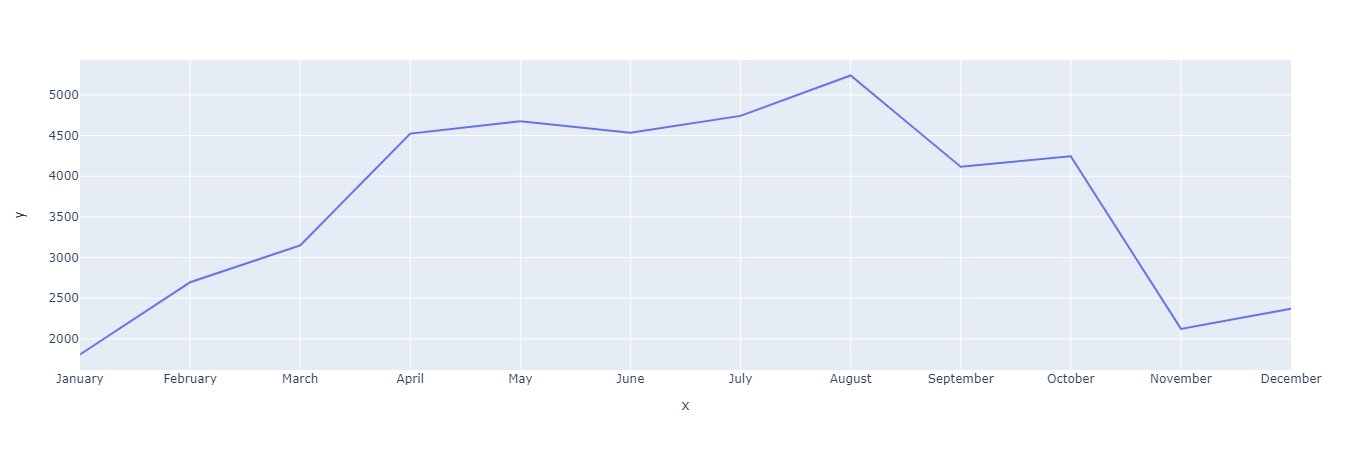

In [30]:
#df_month=df.groupby('arrival_date_month').aggregate('sum').reset_index()

# Got the below values from the above groupby dataframe 

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

value=[1807,2696,3149,4524,4677,4535,4742,5239,4116,4246,2122,2371]

fig=px.line(x=month,y=value)
fig.show()

From the above graph we see that the cancellation increases as the year progress reaching the peak at the middle of the year . Let see the percentages to get a much more clear picture as this could also be due the number of booking reaching a high during the middle of summer 

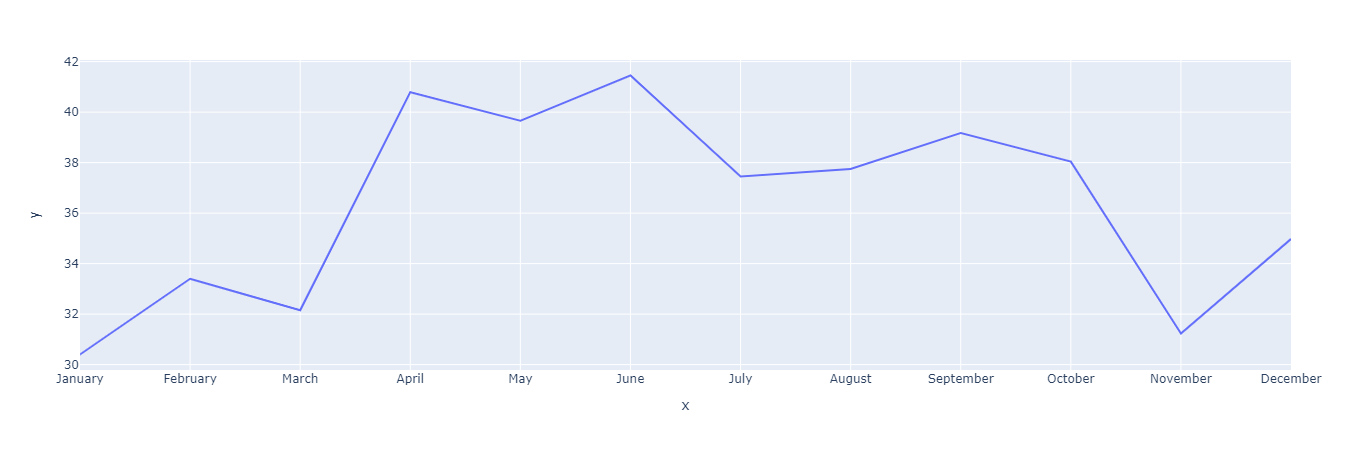

In [31]:
df_percent=df.groupby('arrival_date_month').aggregate('mean').reset_index()

#Values taken from above dataframe 

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

value=[30.4,33.4,32.15,40.79,39.66,41.45,37.45,37.75,39.17,38.04,31.23,34.97]

fig=px.line(x=month,y=value)
fig.show()

We do indeed see a higher cancelations in summer months 

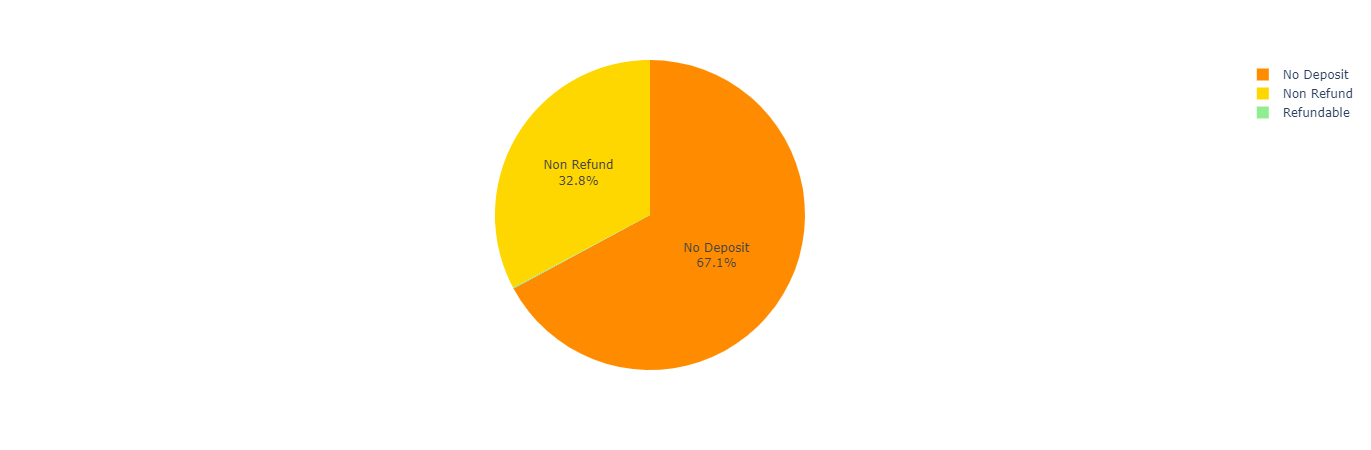

In [32]:
deposit=df.groupby('deposit_type').aggregate('sum')['is_canceled'].to_frame().reset_index()

fig=(px.pie(deposit, values=deposit['is_canceled'], names='deposit_type',color='deposit_type', color_discrete_map=
                                {'Non Refund':'gold',
                                 'No Deposit':'darkorange',
                                 'Refundable':'lightgreen'
                                 }
                            ))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The above graph shows the distribution of cancelation among the various deposit types . With No deposit leading the cancellations when we consider just the cancelation <br>

But the other way to look at this would be the what percent of each booking type canceled that is how many people using the non-refund booking types cancelled doing that actually presents us a completely different picture . I always prefer percentage as compared to absolutes when the counts are different <br>

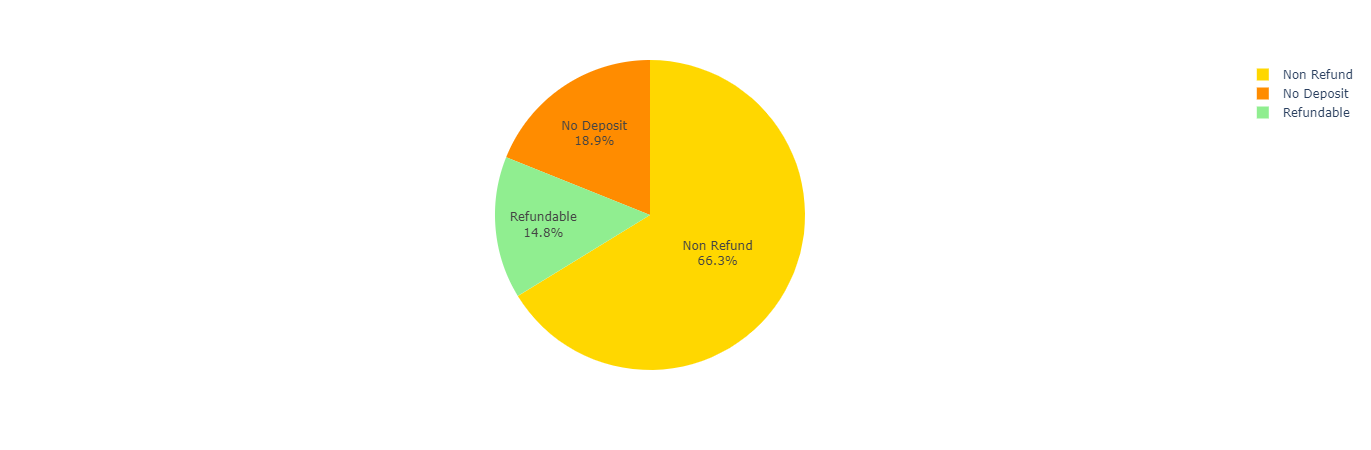

In [33]:
deposit=df.groupby('deposit_type').mean()['is_canceled'].to_frame().reset_index()


fig=(px.pie(deposit, values=deposit['is_canceled'], names='deposit_type',color='deposit_type', color_discrete_map=
                                {'Non Refund':'gold',
                                 'No Deposit':'darkorange',
                                 'Refundable':'lightgreen'
                                 }
                                
                                   ))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


Seeing the corelation value between difference in room type booked and assigned we see a weakish negative corelation -0.24 so this feature should be included in our analysis 

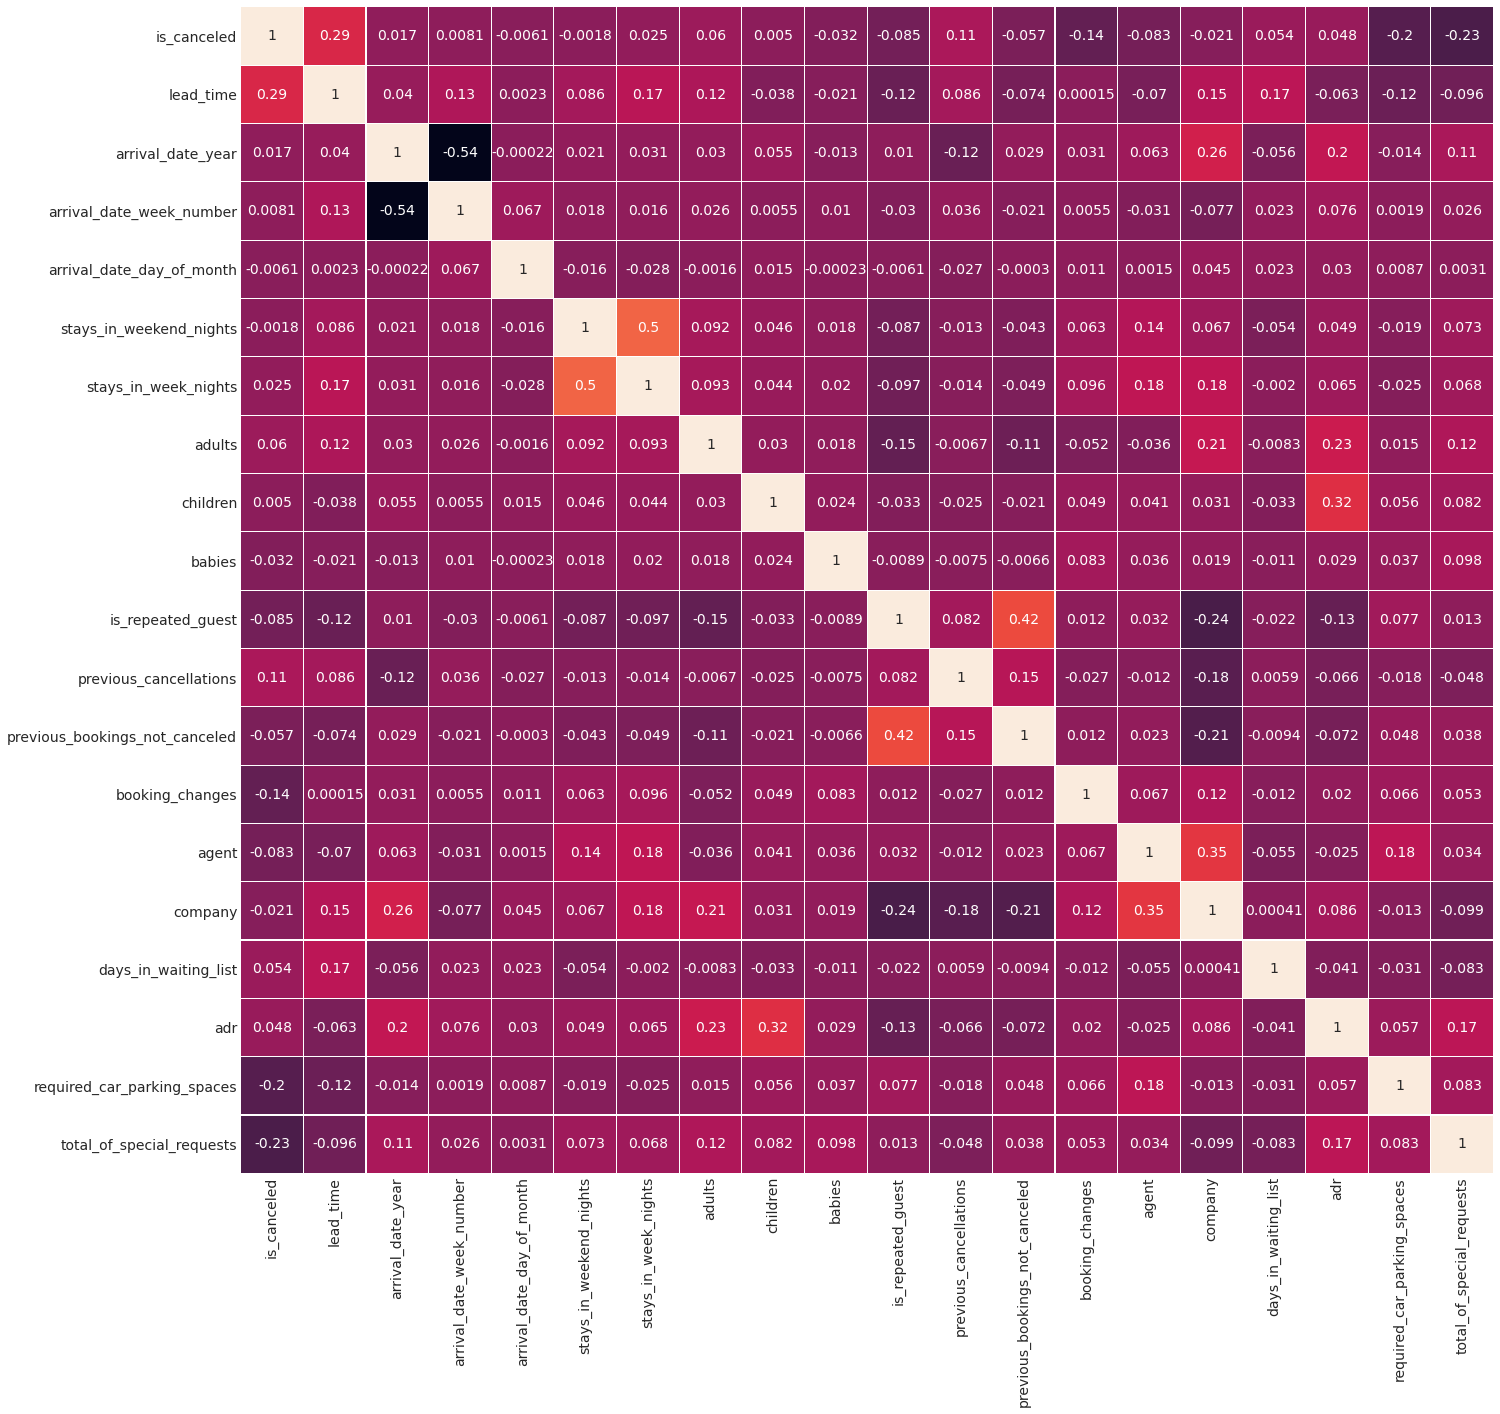

In [34]:
plt.figure(figsize=(20,20));
sns.heatmap(df.corr(),annot=True,linewidths=0.1,cbar=False);


From the above heatmap most variables seem to have either a decent positive or negative relationship with the dependent variable 

In [35]:
#Lets compute a new column in the above dataset to compute number of days stay booked in the hotel 

df['stays_total_duration']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

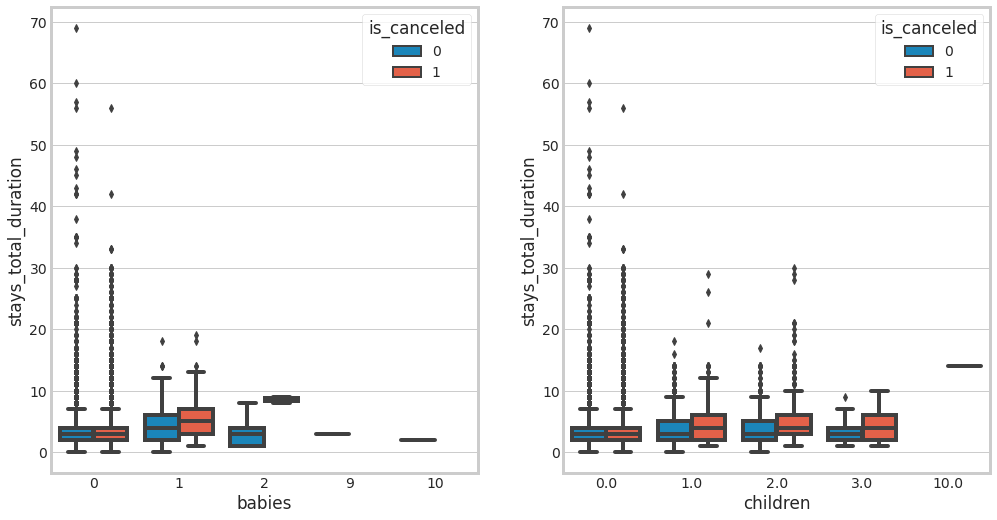

In [36]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x=df['babies'],y=df['stays_total_duration'],hue=df['is_canceled']);


plt.subplot(1,2,2)
sns.boxplot(x=df['children'],y=df['stays_total_duration'],hue=df['is_canceled']);

We see same trend for people having babies and children and their cancelations with weekend and weekday stays . 

* Among the people who who have 0 childredn or babies there is not much difference . <br>
* But people who cancel with 1 or 2 babies usually have a longer stay booked at the hotel . <br>
* Greater than 2 babies count would be do not have any cancelations as this could be group tours and hence cancelations do not depend on single per's will<br>

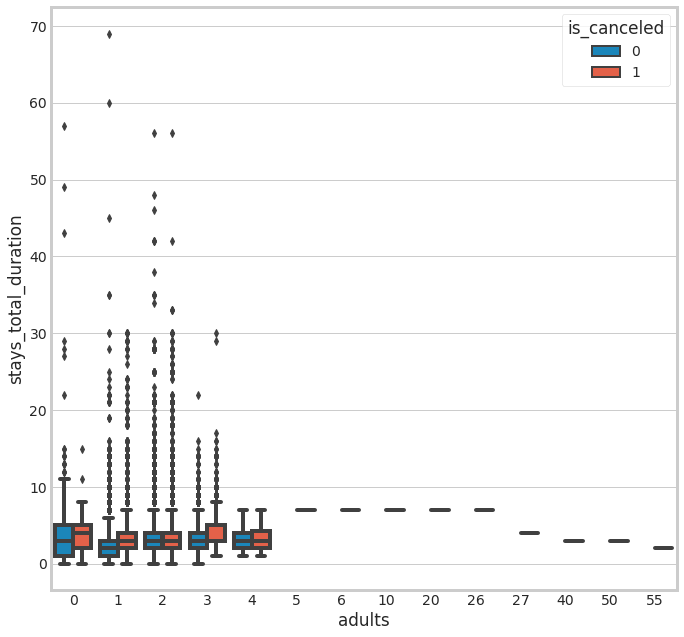

In [37]:
plt.figure(figsize=(10,10)),
sns.boxplot(x=df['adults'],y=df['stays_total_duration'],hue=df['is_canceled']);

Adults do not have the same distribution of cancelation vs total duration 

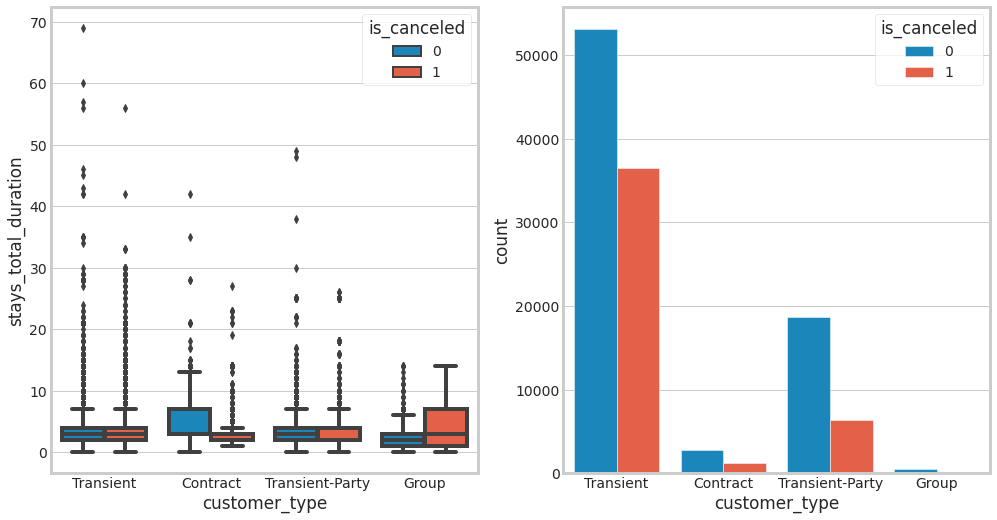

In [38]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x=df['customer_type'],y=df['stays_total_duration'],hue=df['is_canceled']);

plt.subplot(1,2,2)
sns.countplot(x=df['customer_type'],hue=df['is_canceled']);



Here we can see that most customer types is concentrated in Transient and Transient-Party 

Also among the customer_type vs Stays_total_duration we see that group type customer who cancel have a higher range in days of stays

# Key Observations 

* Cancallation increases as the year progresses with the cancellation peaking at the end of year 
* The countries which dominate cancellation are in the neighbourhood of Spain and Portugal in Europe
* From heatmap we have decent corelation with most variables 
* Among the cancallation vs deposits types  we see that No-deposit have higher percentage of cancellation 
* Also among the customer_type vs Stays_total_duration we see that group type customer who cancel have a higher range in days of stays
* Among the people who who have 0 childredn or babies there is not much difference . <br>
* But people who cancel with 1 or 2 babies usually have a longer stay booked at the hotel . <br>
* Greater than 2 babies count would be do not have any cancelations as this could be group tours and hence cancelations do not depend on single per's will<br>

# Implementing Models 

In [39]:

from fastai.tabular import * 

In [40]:
df.shape

(119390, 33)

In [41]:
# Lets train the model for 2015 and 2016 and validate it for 2017 

df_train=df[df['arrival_date_year']!=2017]
df_test=df[df['arrival_date_year']==2017]

In [42]:
# Classify the variables into response , catergorical and numerical 

response='is_canceled'

catergorical=['hotel','meal','country','market_segment','customer_type','deposit_type','assigned_room_type','reserved_room_type','is_repeated_guest'\
              ,'distribution_channel' ,'arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month']

numerical=['adults','children','babies','stays_total_duration','stays_in_weekend_nights','stays_in_week_nights','required_car_parking_spaces'\
          ,'total_of_special_requests','booking_changes','previous_bookings_not_canceled','previous_cancellations','days_in_waiting_list']

procs = [FillMissing, Categorify, Normalize]

path='/kaggle/working'

In [43]:
data = (TabularList.from_df(df_train, path=path, cat_names=catergorical, cont_names=numerical, procs=procs)
                           .split_by_rand_pct(0.15)
                           .label_from_df(cols=response)
                           .add_test(df_test)
                           .databunch())

In [44]:
data.show_batch(rows=10)

hotel,meal,country,market_segment,customer_type,deposit_type,assigned_room_type,reserved_room_type,is_repeated_guest,distribution_channel,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,children_na,adults,children,babies,stays_total_duration,stays_in_weekend_nights,stays_in_week_nights,required_car_parking_spaces,total_of_special_requests,booking_changes,previous_bookings_not_canceled,previous_cancellations,days_in_waiting_list,target
City Hotel,HB,PRT,Offline TA/TO,Transient-Party,Non Refund,A,A,0,TA/TO,2015,September,38,18,False,0.2471,-0.2453,-0.0825,-0.5379,-0.9131,-0.2402,-0.2647,-0.6834,-0.3315,-0.0898,0.8761,-0.1597,1
City Hotel,BB,GBR,Online TA,Contract,No Deposit,A,A,0,TA/TO,2016,April,17,22,False,0.2471,-0.2453,-0.0825,-0.1410,0.0959,-0.2402,-0.2647,3.2788,-0.3315,-0.0898,-0.1233,-0.1597,0
City Hotel,BB,PRT,Online TA,Transient-Party,No Deposit,D,D,0,TA/TO,2016,March,12,17,False,0.2471,-0.2453,-0.0825,-0.1410,-0.9131,0.2930,-0.2647,-0.6834,-0.3315,-0.0898,-0.1233,-0.1597,0
Resort Hotel,FB,PRT,Groups,Transient-Party,No Deposit,A,A,0,TA/TO,2015,November,47,20,False,0.2471,-0.2453,-0.0825,-0.5379,-0.9131,-0.2402,-0.2647,-0.6834,-0.3315,-0.0898,-0.1233,-0.1597,1
City Hotel,HB,PRT,Offline TA/TO,Transient-Party,No Deposit,A,A,0,TA/TO,2016,September,38,13,False,0.2471,-0.2453,-0.0825,-0.5379,-0.9131,-0.2402,-0.2647,0.6374,-0.3315,-0.0898,-0.1233,-0.1597,0
Resort Hotel,BB,PRT,Online TA,Transient,No Deposit,D,D,0,TA/TO,2015,October,40,3,False,0.2471,-0.2453,-0.0825,1.4465,1.1049,1.3595,-0.2647,0.6374,1.2290,-0.0898,-0.1233,-0.1597,1
Resort Hotel,BB,PRT,Corporate,Transient,No Deposit,D,A,0,Corporate,2015,November,48,26,False,-1.3564,-0.2453,-0.0825,-0.9348,-0.9131,-0.7734,3.7483,-0.6834,-0.3315,0.6693,-0.1233,-0.1597,0
City Hotel,BB,PRT,Offline TA/TO,Transient-Party,No Deposit,A,A,0,TA/TO,2015,September,37,9,False,0.2471,-0.2453,-0.0825,1.0496,1.1049,0.8263,-0.2647,-0.6834,-0.3315,-0.0898,0.8761,-0.1597,1
Resort Hotel,BB,PRT,Online TA,Transient,No Deposit,A,A,0,TA/TO,2015,December,52,26,False,0.2471,-0.2453,-0.0825,-0.9348,-0.9131,-0.7734,-0.2647,-0.6834,-0.3315,-0.0898,-0.1233,-0.1597,0
City Hotel,HB,ITA,Offline TA/TO,Transient-Party,No Deposit,E,A,0,TA/TO,2015,August,33,15,False,0.2471,-0.2453,-0.0825,-0.1410,1.1049,-0.7734,-0.2647,-0.6834,-0.3315,-0.0898,-0.1233,-0.1597,0


In [45]:
learn = tabular_learner(data, layers=[200,100], metrics=[AUROC()])

In [46]:
learn.fit(8, 1e-2)

epoch,train_loss,valid_loss,auroc,time
0,0.303030,0.303980,0.934987,00:23
1,0.276567,0.285967,0.941423,00:20
2,0.290327,0.306968,0.943319,00:22
3,0.272346,0.284992,0.943579,00:25
4,0.263310,0.280980,0.945434,00:22
5,0.266349,0.325961,0.935115,00:25
6,0.260089,0.278102,0.945599,00:22
7,0.265146,0.283729,0.943481,00:21


In [47]:
learn.lr_find()

epoch,train_loss,valid_loss,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


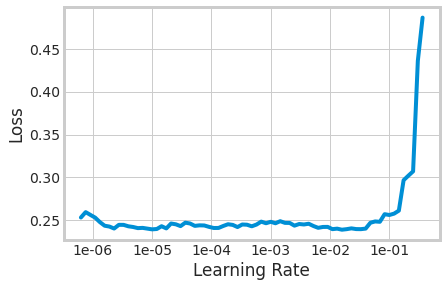

In [48]:
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,auroc,time
0,0.238645,0.269648,0.949452,00:24
1,0.244801,0.271284,0.947809,00:25
2,0.228913,0.274148,0.947826,00:21
3,0.226575,0.270292,0.949125,00:25
4,0.220009,0.265795,0.951069,00:22


In [50]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,auroc,time
0,0.221069,0.266156,0.950771,00:23
1,0.222807,0.272573,0.948853,00:24
2,0.222789,0.271654,0.949490,00:22
3,0.219417,0.276154,0.948001,00:24
4,0.222578,0.281022,0.946649,00:25


In [51]:
learn.fit_one_cycle(5, 1e-5, wd=0.2)

epoch,train_loss,valid_loss,auroc,time
0,0.223109,0.275341,0.948414,00:20
1,0.211840,0.281753,0.946332,00:24
2,0.219459,0.285700,0.946790,00:24
3,0.219223,0.275532,0.948331,00:22
4,0.223985,0.278653,0.946647,00:23


In [52]:
learn.save('Hotel_Cancellation')